In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

Solutions for y in terms of x: [-sqrt(x**3 - x), sqrt(x**3 - x)]


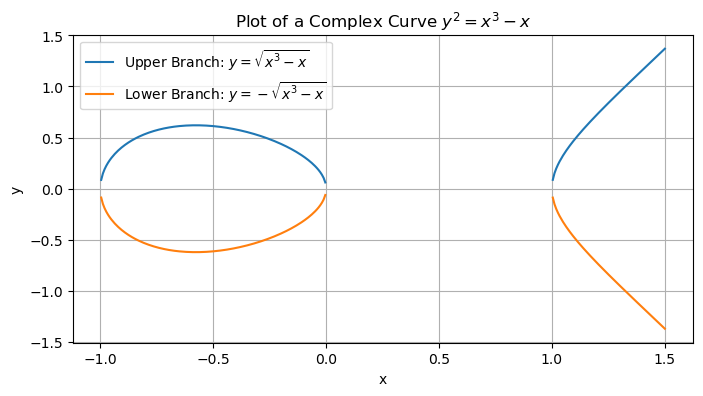

In [2]:
# Using SymPy to manipulate a more complex implicit function
x_sym, y_sym = symbols('x y')
equation = Eq(y_sym**2, x_sym**3 - x_sym)

# Solve for y in terms of x symbolically (might not always work for complex equations)
y_solutions = solve(equation, y_sym)
print("Solutions for y in terms of x:", y_solutions)

# Generate values for a complex curve
x_values = np.linspace(-1.5, 1.5, 400)
y_values_1 = [np.sqrt(x**3 - x) if x**3 - x >= 0 else np.nan for x in x_values]
y_values_2 = [-np.sqrt(x**3 - x) if x**3 - x >= 0 else np.nan for x in x_values]

plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values_1, label='Upper Branch: $y = \sqrt{x^3 - x}$')
plt.plot(x_values, y_values_2, label='Lower Branch: $y = -\sqrt{x^3 - x}$')
plt.title('Plot of a Complex Curve $y^2 = x^3 - x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

p(1,1) = 18
Partial derivative with respect to x: 6*x + 4*y - 2
Partial derivative with respect to y: 4*x + 2*y + 5


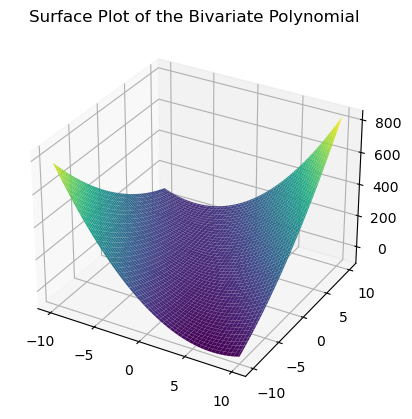

In [3]:
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')

# Define a bivariate polynomial
# Example: p(x, y) = 3*x^2 + 4*x*y + y^2 - 2*x + 5*y + 7
p = 3*x**2 + 4*x*y + y**2 - 2*x + 5*y + 7

# Evaluate the polynomial at specific points
value_at_1_1 = p.subs({x: 1, y: 1})
print("p(1,1) =", value_at_1_1)

# Partial derivatives
px = sp.diff(p, x)  # Differentiate with respect to x
py = sp.diff(p, y)  # Differentiate with respect to y

print("Partial derivative with respect to x:", px)
print("Partial derivative with respect to y:", py)

# Plotting the surface of the polynomial
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = sp.lambdify((x, y), p)(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis')

plt.title('Surface Plot of the Bivariate Polynomial')
plt.show()


### Transform the bivariate polynomial model into 2-dim function

### Parametricalize the implicit function

In [4]:
x_fit, y_fit, z = symbols('x y z')
equation = Eq(z, 3*x_fit**2 + 4*x_fit*y_fit + y_fit**2 - 2*x_fit + 5*y_fit + 7)

In [5]:
y_solutions = solve(equation, y_fit)
print("Solutions for y in terms of x:", y_solutions)

Solutions for y in terms of x: [-2*x - sqrt(4*x**2 + 48*x + 4*z - 3)/2 - 5/2, -2*x + sqrt(4*x**2 + 48*x + 4*z - 3)/2 - 5/2]


### Calculate the end point with preknowed arc length and start point

In [6]:
from scipy.integrate import quad
from scipy.optimize import fsolve

In [7]:
import sympy as sp 

t = sp.symbols('t')

In [8]:
def x(t):
    return t

def y(t):
    return -2*t - sp.sqrt(4*t**2 + 48*t + 797)/2 - 5/2

In [9]:
def dx_dt(t):
    return sp.diff(x(t), t)

def dy_dt(t):
    return sp.diff(y(t), t)

In [10]:
y_tmp = symbols('y')
equation = Eq(dy_dt(t), y_tmp)
solve(equation, y_tmp)

[2*(-t - sqrt(4*t**2 + 48*t + 797) - 6)/sqrt(4*t**2 + 48*t + 797)]

In [11]:
def dx(t):
    return 1

def dy(t):
    return 2*(-t - np.sqrt(4*t**2 + 48*t + 797) - 6)/np.sqrt(4*t**2 + 48*t + 797)

def arc_length(t, t0):
    
    # " typically occurs when you attempt to compute a derivative with respect to a numerical value instead of a symbolic variable using SymPy "
    
    # integral, _ = quad(lambda u: np.sqrt(dx_dt(u)**2 + dy_dt(u)**2), t0, t)
    
    integral, _ = quad(lambda u: np.sqrt(dx(u)**2 + dy(u)**2), t0, t)
    
    return integral

In [12]:
L = 5

def equation(t):
    return arc_length(t, 0) - L

In [13]:
initial_estimate = 2

t_solution = fsolve(equation, initial_estimate)[0] # equation = 0 by default 

In [14]:
end_x = x(t_solution)
end_y = y(t_solution)

print(f"The endpoint coordinates are ({end_x:.2f}, {end_y:.2f}) at t = {t_solution:.2f}.")

The endpoint coordinates are (1.87, -21.25) at t = 1.87.


### valid

In [15]:
arc_length(1.87, 0)

4.994004393093105